## 회귀분석

In [1]:
import pandas as pd

In [4]:
anal_df = pd.read_csv("C:/data/now_used/1015_data3.csv")
anal_df.head(5)

,건축물대장코드,구시군,읍면동,번,지,입주일,상가유형,지하총층,지상총층,연면적m2,...,주변세대수점수,주변평당가점수,상권코드명,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,공시지가,행정동생활인구
0,11110-10014,종로구,동숭동,1,114,1982-12-24,근린상가,1,5,1563.66,...,1.176,10.477,이화장길,1276469803,92138,926358383,350111420,131091.221409,22840000,38293.0
1,11110-100180009,종로구,동숭동,1,67,2008-07-03,기타상가,4,5,8585.08,...,1.207,10.754,이화장길,1276469803,92138,926358383,350111420,66131.584897,16310000,38293.0
2,11110-100184402,종로구,관훈동,186,0,2008-12-29,근린상가,0,3,172.11,...,0.363,19.104,계동길,725431028,41102,530637184,194793844,101021.253105,24600000,86083.0
3,11110-100190514,종로구,누하동,245,6,2011-09-28,근린상가,0,4,233.03,...,1.979,16.353,자하문로7길,1266093633,59989,952608422,313485211,67634.444078,7727000,40687.0
4,11110-100190842,종로구,효제동,19,3,2011-10-14,근린상가,0,5,253.80,...,0.810,10.063,율곡로16길,701283928,59235,586470792,114813136,112721.417069,4878000,30695.0


In [5]:
# 더미변수 추가

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['주차대수']]

anal_df['주차가능여부'] = lst

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['승강기수']]

anal_df['승강기여부'] = lst

In [6]:
anal_df.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '입주일', '상가유형', '지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', '경도', '위도', 'usage_area', 'cont_area', 'RENT',
       'rent_ua', 'rent_ca', 'floor', '전철역명', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '가까운아파트', '가까운아파트총세대수', '가까운아파트평균평당가',
       '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수',
       '평균주중매출금액', '평균주말매출금액', '편의점임대료', '공시지가', '행정동생활인구', '주차가능여부', '승강기여부'],
      dtype='object')

In [7]:
print(len(anal_df), len(anal_df['건축물대장코드'].unique()))

9262 9262


In [9]:
anal_df = anal_df[['건축물대장코드', '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료',
       '주차가능여부', '승강기여부','행정동생활인구']]

In [10]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 주차가능여부 + 승강기여부 + 행정동생활인구', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:19:39   Log-Likelihood:                -22560.
No. Observations:                9262   AIC:                         4.518e+04
Df Residuals:                    9234   BIC:                         4.538e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8842      0.206     13.989      0.000       2.480       3.288
usage_area     -0.0005   4.83e-05    -10.141      0.000      -0.001      -0.000
cont_area   -2.249e-06   4.49e-06     -0.501      0.617   -1.11e-05    6.56e-06
지하총층           -0.1510      0.048     -3.155      0.002      -0.245      -0.057
지상총층           -0.0719      0.019     -3.856      0.000      -0.109      -0.035
연면적m2       -3.085e-05    1.8e-05     -1.714      0.087   -6.61e-05    4.44e-06
주차대수            0.0005      0.002      0.299      0.765      -0.003       0.004
승강기수            0.1756      0.066      2.678      0.007       0.047       0.304
지하철거리m         -0.0275      0.011     -2.602      0.009      -0.048      -0.007
승객수점수        4.206e-06   4.98e-07      8.444      0.000    3.23e-06    5.18e-06
횡단보도거리m        -0.0019      0.001     -2.686      0.007      -0.003      -0.001
건물별전기사용량     4.433e-06   1.13e-06      3.934      0.000    2.22e-06    6.64e-06
본번별평균사용량     2.724e-06   7.93e-07      3.435      0.001    1.17e-06    4.28e-06
건물연차           -0.0115      0.003     -3.509      0.000      -0.018      -0.005
공시지가         3.161e-07   6.58e-09     48.051      0.000    3.03e-07    3.29e-07
가까운아파트총세대수      0.0001   7.22e-05      1.726      0.084   -1.69e-05       0.000
가까운아파트평균평당가    -0.0001   3.29e-05     -4.038      0.000      -0.000   -6.84e-05
아파트거리          -0.0001      0.000     -0.708      0.479      -0.000       0.000
주변세대수점수         0.0360      0.010      3.658      0.000       0.017       0.055
주변평당가점수        -0.0021      0.001     -1.839      0.066      -0.004       0.000
평균월매출금액       1.73e-10   2.89e-11      5.991      0.000    1.16e-10     2.3e-10
평균월매출건수      -5.89e-06   1.49e-06     -3.943      0.000   -8.82e-06   -2.96e-06
평균주중매출금액     6.603e-11   4.41e-11      1.497      0.134   -2.04e-11    1.53e-10
평균주말매출금액      1.66e-09   2.34e-10      7.090      0.000     1.2e-09    2.12e-09
편의점임대료       3.314e-06   5.58e-07      5.940      0.000    2.22e-06    4.41e-06
주차가능여부         -0.2102      0.070     -2.985      0.003      -0.348      -0.072
승강기여부           0.2435      0.113      2.163      0.031       0.023       0.464
행정동생활인구     -4.136e-06   1.07e-06     -3.855      0.000   -6.24e-06   -2.03e-06
==============================================================================
Omnibus:                     7689.596   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511349.286
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      38.698   Cond. No.                     1.10e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x28c3224cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x28c32262310>,
 'boxes': [<matplotlib.lines.Line2D at 0x28c3224c8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x28c322629d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28c32262cd0>],
 'means': []}

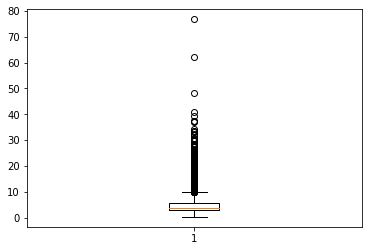

In [12]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [13]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [14]:
anal_df2.columns

Index(['건축물대장코드', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       'cont_area', 'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리',
       '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수', '평균주중매출금액',
       '평균주말매출금액', '편의점임대료', '주차가능여부', '승강기여부', '행정동생활인구'],
      dtype='object')

In [47]:
z = anal_df2[[ '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료','주차가능여부', '승강기여부','행정동생활인구']]

In [48]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-48-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
0,1,5,1563.66000,0,1,15.50000,15.50000,48.38710,1.08208,71533.89800,...,1.17600,10.47700,1276469803,92138,926358383,350111420,131091.22141,0,1,38293.00000
1,4,5,8585.08000,7,4,103.00000,143.92000,13.15534,1.37314,117064.16400,...,1.20700,10.75400,1276469803,92138,926358383,350111420,66131.58490,1,1,38293.00000
2,0,3,172.11000,0,1,185.00000,200.00000,11.89189,2.50864,46623.00300,...,0.36300,19.10400,725431028,41102,530637184,194793844,101021.25311,0,1,86083.00000
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9258,1,3,988.04000,0,0,41.19000,41.19000,10.43943,0.72985,33569.45200,...,12.85300,39.51000,1138515459,61110,811089104,327426355,37556.49911,0,0,59355.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000
9260,1,4,659.00000,5,0,291.07000,321.87000,4.67242,6.16591,22247.03700,...,7.33900,47.81800,731403749,43065,546770943,184632806,39411.06484,1,0,55551.00000


In [49]:
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
편의점임대료         0
주차가능여부         0
승강기여부          0
행정동생활인구        0
dtype: int64

In [50]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
편의점임대료         0
주차가능여부         0
승강기여부          0
행정동생활인구        0
dtype: int64

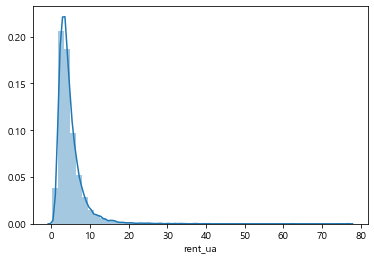

In [51]:
sns.distplot(z.iloc[:,7])
plt.show()

In [52]:
import scipy as sp
import scipy.stats as stats

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


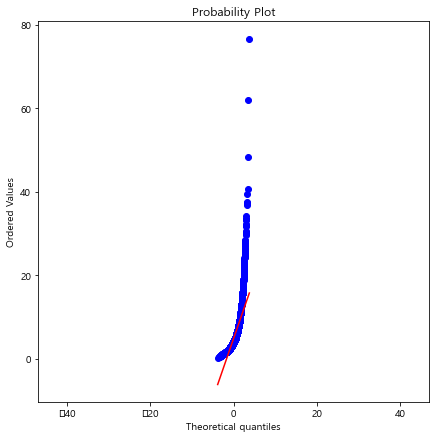

In [53]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [54]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-54-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
0,1,5,1563.66000,0,1,15.50000,15.50000,nan,1.08208,71533.89800,...,1.17600,10.47700,1276469803,92138,926358383,350111420,131091.22141,0,1,38293.00000
1,4,5,8585.08000,7,4,103.00000,143.92000,nan,1.37314,117064.16400,...,1.20700,10.75400,1276469803,92138,926358383,350111420,66131.58490,1,1,38293.00000
2,0,3,172.11000,0,1,185.00000,200.00000,nan,2.50864,46623.00300,...,0.36300,19.10400,725431028,41102,530637184,194793844,101021.25311,0,1,86083.00000
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9258,1,3,988.04000,0,0,41.19000,41.19000,nan,0.72985,33569.45200,...,12.85300,39.51000,1138515459,61110,811089104,327426355,37556.49911,0,0,59355.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000
9260,1,4,659.00000,5,0,291.07000,321.87000,4.67242,6.16591,22247.03700,...,7.33900,47.81800,731403749,43065,546770943,184632806,39411.06484,1,0,55551.00000


In [55]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9262 entries, 0 to 9261
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         9262 non-null   int64  
 1   지상총층         9262 non-null   int64  
 2   연면적m2        9262 non-null   float64
 3   주차대수         9262 non-null   int64  
 4   승강기수         9262 non-null   int64  
 5   usage_area   9262 non-null   float64
 6   cont_area    9262 non-null   float64
 7   rent_ua      8720 non-null   float64
 8   지하철거리m       9262 non-null   float64
 9   승객수점수        9262 non-null   float64
 10  건물별전기사용량     9262 non-null   int64  
 11  본번별평균사용량     9262 non-null   float64
 12  횡단보도거리m      9262 non-null   float64
 13  건물연차         9262 non-null   int64  
 14  공시지가         9262 non-null   int64  
 15  가까운아파트총세대수   9262 non-null   int64  
 16  가까운아파트평균평당가  9262 non-null   float64
 17  아파트거리        9262 non-null   float64
 18  주변세대수점수      9262 non-null   float64
 19  주변평당가점

In [56]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
6,5,6,3869.33000,4,2,370.05000,370.05000,4.32374,2.09568,41692.82900,...,1.00600,8.17500,1276469803,92138,926358383,350111420,85005.10031,1,1,38293.00000
8,1,3,1211.93000,5,0,76.03000,76.03000,5.39261,1.09046,59317.67000,...,0.21600,14.13000,725431028,41102,530637184,194793844,112503.64325,1,0,12726.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70000,15,0,440.82000,450.82000,4.19672,3.57759,47394.33000,...,1.15700,19.70600,845419656,45138,598585337,246834320,38862.98024,1,0,105763.00000
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000
9260,1,4,659.00000,5,0,291.07000,321.87000,4.67242,6.16591,22247.03700,...,7.33900,47.81800,731403749,43065,546770943,184632806,39411.06484,1,0,55551.00000


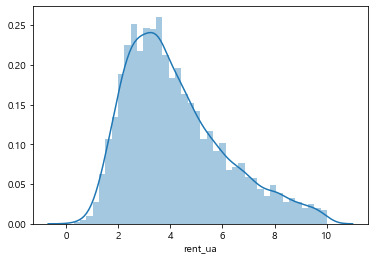

In [57]:
sns.distplot(z1.iloc[:,7])
plt.show()

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


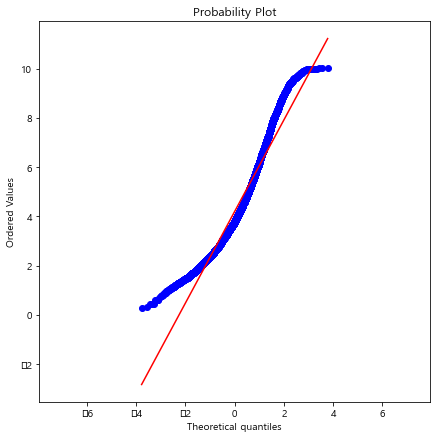

In [58]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [59]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
지하총층,1.00000,0.48152,0.57993,0.31713,0.37903,0.17810,0.21675,0.11978,-0.00674,0.15599,...,0.03463,0.14255,0.00505,0.05382,0.08397,0.06049,0.13526,0.21844,0.34471,0.14696
지상총층,0.48152,1.00000,0.72553,0.56033,0.62231,0.25445,0.28769,0.15571,-0.01897,0.17487,...,-0.00154,0.17481,0.01447,0.11551,0.14111,0.10502,0.15226,0.48641,0.61302,0.16553
연면적m2,0.57993,0.72553,1.00000,0.57046,0.54960,0.30599,0.35023,0.18165,0.00461,0.15112,...,0.03565,0.20280,-0.00590,0.07598,0.11669,0.07782,0.14351,0.41530,0.53473,0.16791
주차대수,0.31713,0.56033,0.57046,1.00000,0.45631,0.20927,0.23766,0.08513,0.04655,0.06433,...,0.00087,0.16589,0.00763,0.05926,0.09359,0.08151,0.09560,0.88860,0.44088,0.16128
승강기수,0.37903,0.62231,0.54960,0.45631,1.00000,0.24289,0.27436,0.18470,-0.04064,0.17654,...,0.02081,0.15261,0.00483,0.09158,0.12741,0.09298,0.14964,0.34342,0.99376,0.13886
usage_area,0.17810,0.25445,0.30599,0.20927,0.24289,1.00000,0.97061,0.03916,-0.05653,0.27451,...,-0.08224,0.07668,0.05907,0.15924,0.18948,0.19046,0.14513,0.17471,0.24699,0.18958
cont_area,0.21675,0.28769,0.35023,0.23766,0.27436,0.97061,1.00000,0.07946,-0.05650,0.28710,...,-0.08119,0.09773,0.05682,0.16073,0.19494,0.19119,0.16046,0.19237,0.27383,0.20337
rent_ua,0.11978,0.15571,0.18165,0.08513,0.18470,0.03916,0.07946,1.00000,-0.23197,0.35001,...,-0.04275,0.16078,0.11015,0.27379,0.28847,0.29975,0.30122,0.04237,0.17602,0.19173
지하철거리m,-0.00674,-0.01897,0.00461,0.04655,-0.04064,-0.05653,-0.05650,-0.23197,1.00000,-0.47421,...,0.05202,-0.06520,-0.17417,-0.24323,-0.23968,-0.21538,-0.25623,0.06433,-0.03734,-0.06072
승객수점수,0.15599,0.17487,0.15112,0.06433,0.17654,0.27451,0.28710,0.35001,-0.47421,1.00000,...,-0.14305,0.04596,0.22123,0.45446,0.44454,0.39617,0.34156,0.03211,0.17058,0.23358


In [60]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


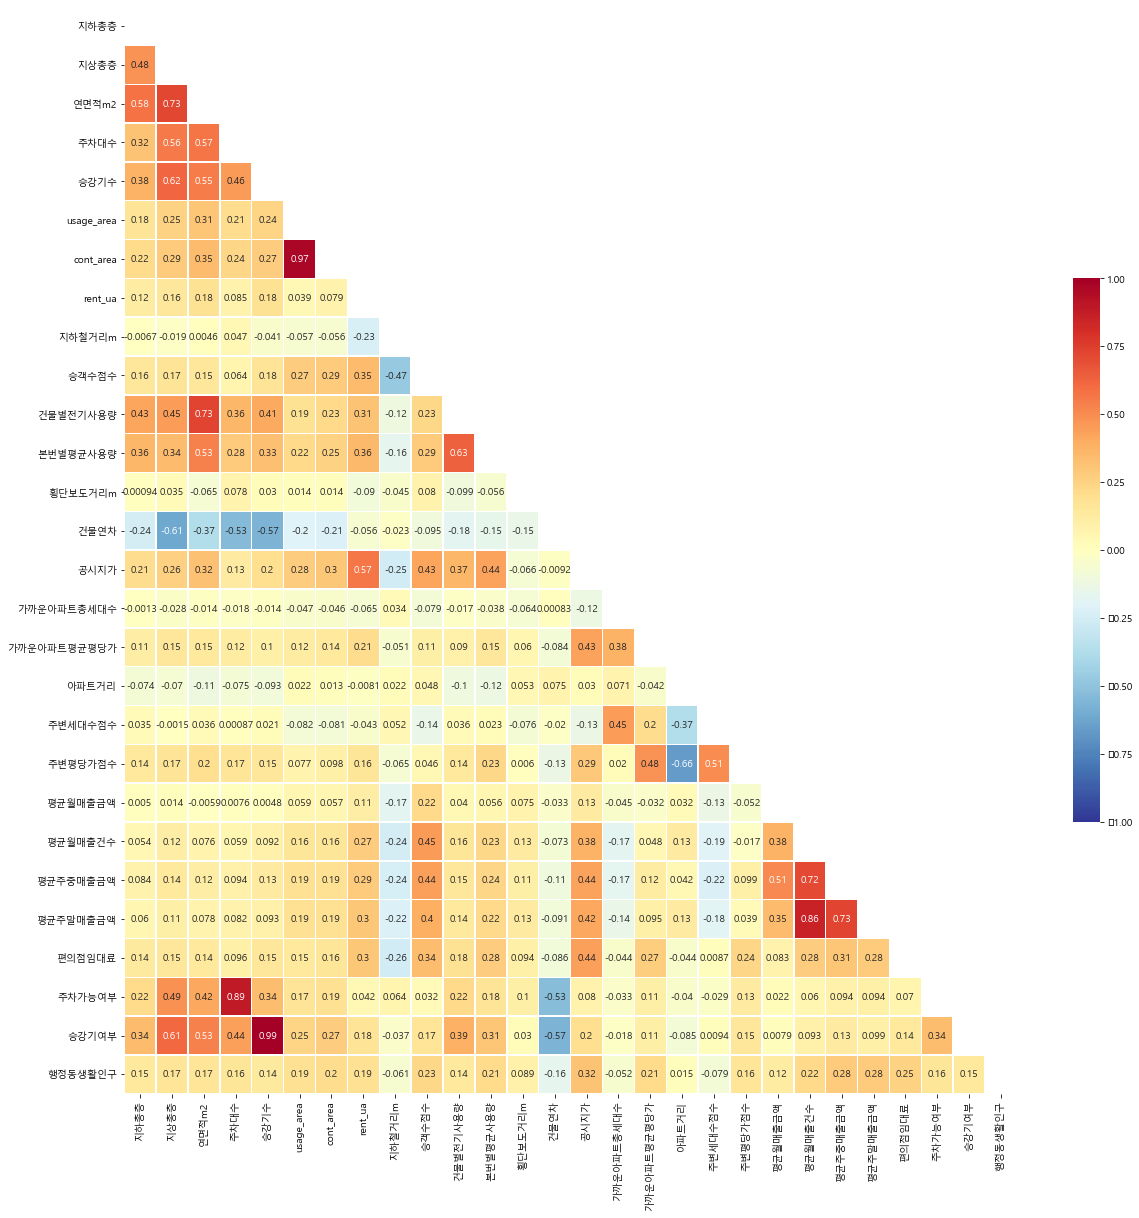

In [61]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 주요컬럼 이상치 제거
상관계수가 0.3 이상인 변수의 이상치를 제거한다.
* 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 편의점임대료

In [62]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 3 to 9261
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8720 non-null   int64  
 1   지상총층         8720 non-null   int64  
 2   연면적m2        8720 non-null   float64
 3   주차대수         8720 non-null   int64  
 4   승강기수         8720 non-null   int64  
 5   usage_area   8720 non-null   float64
 6   cont_area    8720 non-null   float64
 7   rent_ua      8720 non-null   float64
 8   지하철거리m       8720 non-null   float64
 9   승객수점수        8720 non-null   float64
 10  건물별전기사용량     8720 non-null   int64  
 11  본번별평균사용량     8720 non-null   float64
 12  횡단보도거리m      8720 non-null   float64
 13  건물연차         8720 non-null   int64  
 14  공시지가         8720 non-null   int64  
 15  가까운아파트총세대수   8720 non-null   int64  
 16  가까운아파트평균평당가  8720 non-null   float64
 17  아파트거리        8720 non-null   float64
 18  주변세대수점수      8720 non-null   float64
 19  주변평당가점

In [63]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-63-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
6,5,6,3869.33000,4,2,370.05000,370.05000,4.32374,2.09568,41692.82900,...,1.00600,8.17500,1276469803,92138,926358383,350111420,85005.10031,1,1,38293.00000
8,1,3,1211.93000,5,0,76.03000,76.03000,5.39261,1.09046,59317.67000,...,0.21600,14.13000,725431028,41102,530637184,194793844,112503.64325,1,0,12726.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70000,15,0,440.82000,450.82000,4.19672,3.57759,47394.33000,...,1.15700,19.70600,845419656,45138,598585337,246834320,38862.98024,1,0,105763.00000
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000
9260,1,4,659.00000,5,0,291.07000,321.87000,4.67242,6.16591,22247.03700,...,7.33900,47.81800,731403749,43065,546770943,184632806,39411.06484,1,0,55551.00000


In [64]:
# 건물별전기사용량 이상값 제거

q1 = z2["건물별전기사용량"].quantile(0.25)
q3 = z2["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z2.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-64-17f55af414cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
10,1,3,582.39000,5,0,140.00000,140.00000,2.71429,3.70969,59466.01000,...,0.61500,8.19300,725431028,41102,530637184,194793844,112503.64325,1,0,12726.00000
12,1,2,185.67000,0,0,69.30000,69.30000,3.03030,33.48793,4965.40600,...,1.26000,14.07400,321750678,12670,238345356,83405321,42156.36178,0,0,39884.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31000,6,0,100.00000,115.00000,2.30000,1.60626,59177.33600,...,4.22100,29.32500,844447969,41392,603684567,240763402,51101.04309,1,0,51049.00000
9255,1,3,931.28000,0,0,46.28000,46.28000,3.88937,3.22380,32689.02000,...,26.06600,41.06800,1189200211,63610,856807483,332392728,37556.49911,0,0,30279.00000
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000


In [65]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-65-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
12,1,2,185.67000,0,0,69.30000,69.30000,3.03030,33.48793,4965.40600,...,1.26000,14.07400,321750678,12670,238345356,83405321,42156.36178,0,0,39884.00000
15,1,3,480.67000,0,0,146.71000,146.71000,2.24934,3.24151,60826.45000,...,1.73800,7.49600,1276469803,92138,926358383,350111420,85005.10031,0,0,38293.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31000,6,0,100.00000,115.00000,2.30000,1.60626,59177.33600,...,4.22100,29.32500,844447969,41392,603684567,240763402,51101.04309,1,0,51049.00000
9255,1,3,931.28000,0,0,46.28000,46.28000,3.88937,3.22380,32689.02000,...,26.06600,41.06800,1189200211,63610,856807483,332392728,37556.49911,0,0,30279.00000
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000


In [66]:
# 공시지가 이상값 제거

q1 = z6["공시지가"].quantile(0.25)
q3 = z6["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-66-9075cfbc185d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
12,1,2,185.67000,0,0,69.30000,69.30000,3.03030,33.48793,4965.40600,...,1.26000,14.07400,321750678,12670,238345356,83405321,42156.36178,0,0,39884.00000
15,1,3,480.67000,0,0,146.71000,146.71000,2.24934,3.24151,60826.45000,...,1.73800,7.49600,1276469803,92138,926358383,350111420,85005.10031,0,0,38293.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31000,6,0,100.00000,115.00000,2.30000,1.60626,59177.33600,...,4.22100,29.32500,844447969,41392,603684567,240763402,51101.04309,1,0,51049.00000
9255,1,3,931.28000,0,0,46.28000,46.28000,3.88937,3.22380,32689.02000,...,26.06600,41.06800,1189200211,63610,856807483,332392728,37556.49911,0,0,30279.00000
9257,1,4,493.71000,3,0,783.79000,891.83000,2.15619,4.35704,8921.37400,...,18.96800,40.63000,237774734,14458,184722166,53052568,157349.89648,1,0,50099.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000


In [67]:
# 편의점임대료 이상값 제거

q1 = z7["편의점임대료"].quantile(0.25)
q3 = z7["편의점임대료"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-67-fce20a1b0570>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03000,2,0,58.22000,58.22000,3.77877,4.79170,29040.49000,...,1.97900,16.35300,1266093633,59989,952608422,313485211,67634.44408,1,0,40687.00000
4,0,5,253.80000,0,0,58.90000,66.20000,2.03735,3.81861,34219.91600,...,0.81000,10.06300,701283928,59235,586470792,114813136,112721.41707,0,0,30695.00000
9,1,4,458.95000,0,0,73.03000,73.03000,4.79255,3.94422,24836.37100,...,1.66000,14.74200,1132740284,82393,810808853,321931432,95483.87097,0,0,55931.00000
12,1,2,185.67000,0,0,69.30000,69.30000,3.03030,33.48793,4965.40600,...,1.26000,14.07400,321750678,12670,238345356,83405321,42156.36178,0,0,39884.00000
15,1,3,480.67000,0,0,146.71000,146.71000,2.24934,3.24151,60826.45000,...,1.73800,7.49600,1276469803,92138,926358383,350111420,85005.10031,0,0,38293.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1,7,2256.70000,16,0,1622.88000,2078.64000,4.92951,4.21238,23925.62000,...,1.15600,23.31500,1255617586,56974,917748606,337868981,35753.14783,1,0,105763.00000
9254,1,3,879.31000,6,0,100.00000,115.00000,2.30000,1.60626,59177.33600,...,4.22100,29.32500,844447969,41392,603684567,240763402,51101.04309,1,0,51049.00000
9255,1,3,931.28000,0,0,46.28000,46.28000,3.88937,3.22380,32689.02000,...,26.06600,41.06800,1189200211,63610,856807483,332392728,37556.49911,0,0,30279.00000
9259,1,2,741.99000,4,0,127.60000,127.60000,3.76176,2.04613,16942.14200,...,10.37400,109.82600,1138515459,61110,811089104,327426355,37556.49911,1,0,59355.00000


## 회귀분석

In [68]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 주차가능여부 + 승강기여부 + 행정동생활인구', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     101.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:23:45   Log-Likelihood:                -10810.
No. Observations:                6185   AIC:                         2.168e+04
Df Residuals:                    6157   BIC:                         2.186e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2135      0.146     15.176      0.000       1.928       2.499
usage_area     -0.0004   6.32e-05     -6.989      0.000      -0.001      -0.000
cont_area    9.931e-05   4.78e-05      2.078      0.038    5.65e-06       0.000
지하총층           -0.2296      0.046     -4.972      0.000      -0.320      -0.139
지상총층           -0.0353      0.019     -1.861      0.063      -0.072       0.002
연면적m2          -0.0003   5.11e-05     -5.841      0.000      -0.000      -0.000
주차대수            0.0329      0.006      5.538      0.000       0.021       0.045
승강기수            0.4816      0.207      2.332      0.020       0.077       0.886
지하철거리m         -0.0076      0.006     -1.228      0.220      -0.020       0.005
승객수점수        4.544e-06   6.72e-07      6.765      0.000    3.23e-06    5.86e-06
횡단보도거리m        -0.0014      0.000     -3.538      0.000      -0.002      -0.001
건물별전기사용량     3.906e-05   5.12e-06      7.634      0.000     2.9e-05    4.91e-05
본번별평균사용량     2.258e-05   5.51e-06      4.096      0.000    1.18e-05    3.34e-05
건물연차           -0.0105      0.002     -4.989      0.000      -0.015      -0.006
공시지가         3.065e-07   9.46e-09     32.407      0.000    2.88e-07    3.25e-07
가까운아파트총세대수     -0.0001   4.72e-05     -2.138      0.033      -0.000    -8.4e-06
가까운아파트평균평당가 -2.339e-05   2.45e-05     -0.953      0.341   -7.15e-05    2.47e-05
아파트거리        9.941e-05      0.000      0.832      0.406      -0.000       0.000
주변세대수점수         0.0191      0.007      2.771      0.006       0.006       0.033
주변평당가점수        -0.0008      0.001     -0.623      0.533      -0.003       0.002
평균월매출금액      1.129e-10   2.14e-11      5.283      0.000     7.1e-11    1.55e-10
평균월매출건수     -1.622e-06   1.11e-06     -1.458      0.145    -3.8e-06    5.59e-07
평균주중매출금액     7.577e-12   3.39e-11      0.223      0.823   -5.89e-11    7.41e-11
평균주말매출금액      7.71e-10   1.68e-10      4.581      0.000    4.41e-10     1.1e-09
편의점임대료       9.318e-07   6.77e-07      1.377      0.169   -3.95e-07    2.26e-06
주차가능여부         -0.2402      0.049     -4.951      0.000      -0.335      -0.145
승강기여부          -0.4289      0.214     -2.000      0.046      -0.849      -0.009
행정동생활인구     -1.817e-06   7.42e-07     -2.448      0.014   -3.27e-06   -3.62e-07
==============================================================================
Omnibus:                      886.242   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1671.609
Skew:                           0.906   Prob(JB):                         0.00
Kurtosis:                       4.789   Cond. No.                     2.43e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [69]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 '평균월매출금액',
 '평균월매출건수',
 '평균주중매출금액',
 '평균주말매출금액',
 '편의점임대료',
 '주차가능여부',
 '승강기여부',
 '행정동생활인구']

In [71]:
pd.options.display.float_format = '{:.5f}'.format

In [72]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,3.55320
1,cont_area,3.51437
2,지하총층,1.38412
3,지상총층,2.84899
4,연면적m2,26.58651
5,주차대수,22.23252
6,승강기수,27.42465
7,지하철거리m,1.24196
8,승객수점수,1.49194
9,횡단보도거리m,1.09799


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


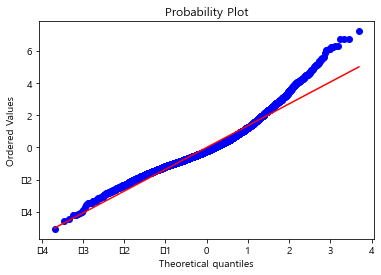

In [73]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 주차가능여부 + 승강기여부 + 행정동생활인구', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

## 모든 변수

In [74]:
z8.columns

Index(['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '주차가능여부',
       '승강기여부', '행정동생활인구'],
      dtype='object')

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = z8[['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '주차가능여부',
       '승강기여부', '행정동생활인구']]
y = z8['rent_ua']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [76]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([2.86051063, 2.25005528, 3.06790137, ..., 3.74855073, 3.01482496,
       2.53914135])

In [77]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)**0.5
rmse 

1.3439673339594846

In [78]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '주차가능여부',
       '승강기여부', '행정동생활인구'], 'importance' : model.feature_importances_})

,변수,importance
0,지하총층,0.00391
1,지상총층,0.00883
2,연면적m2,0.04259
3,주차대수,0.00871
4,승강기수,0.00124
5,usage_area,0.08021
6,지하철거리m,0.04339
7,승객수점수,0.04746
8,건물별전기사용량,0.04556
9,본번별평균사용량,0.03986


In [79]:
format(model.score(x_train, y_train))

'0.9137892945835102'

In [80]:
format(model.score(x_test, y_test))

'0.3600709065333776'

## 다중공선성 10 이상 변수 제외, p-value > 0.05 변수 제외

In [40]:
model3 = ols('rent_ua ~ usage_area + 지하총층 + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 주변세대수점수 + 평균월매출금액 + 평균주말매출금액 + 주차가능여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     202.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:04:29   Log-Likelihood:                -10421.
No. Observations:                6108   AIC:                         2.087e+04
Df Residuals:                    6094   BIC:                         2.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8768      0.099     19.006      0.000       1.683       2.070
usage_area    -0.0003   3.35e-05     -8.851      0.000      -0.000      -0.000
지하총층          -0.2973      0.039     -7.545      0.000      -0.374      -0.220
승객수점수       5.201e-06   5.95e-07      8.735      0.000    4.03e-06    6.37e-06
횡단보도거리m       -0.0015      0.000     -3.857      0.000      -0.002      -0.001
건물별전기사용량      2.3e-05   4.46e-06      5.156      0.000    1.43e-05    3.17e-05
본번별평균사용량    1.973e-05   5.31e-06      3.719      0.000    9.33e-06    3.01e-05
건물연차          -0.0063      0.002     -3.690      0.000      -0.010      -0.003
공시지가        2.837e-07   7.98e-09     35.570      0.000    2.68e-07    2.99e-07
가까운아파트총세대수 -9.138e-05   3.66e-05     -2.495      0.013      -0.000   -1.96e-05
주변세대수점수        0.0166      0.006      2.898      0.004       0.005       0.028
평균월매출금액     9.965e-11   1.94e-11      5.143      0.000    6.17e-11    1.38e-10
평균주말매출금액    5.753e-10   1.04e-10      5.525      0.000    3.71e-10    7.79e-10
주차가능여부        -0.1430      0.041     -3.512      0.000      -0.223      -0.063
==============================================================================
Omnibus:                      615.547   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.487
Skew:                           0.759   Prob(JB):                    6.54e-202
Kurtosis:                       4.156   Cond. No.                     7.46e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.06579
1,지하총층,1.07792
2,승객수점수,1.24263
3,횡단보도거리m,1.06299
4,건물별전기사용량,1.33944
5,본번별평균사용량,1.35441
6,건물연차,1.41169
7,공시지가,1.41096
8,가까운아파트총세대수,1.46620
9,주변세대수점수,1.47930


## RF

In [42]:
z8.columns

Index(['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = z8[['지하총층',  'usage_area', '승객수점수', '횡단보도거리m', '건물별전기사용량', '본번별평균사용량',
       '건물연차', '공시지가', '가까운아파트총세대수', '주변세대수점수', '평균월매출금액', '평균주말매출금액', '주차가능여부']]
y = z8['rent_ua']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [45]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([3.16397014, 2.80293884, 2.55997257, ..., 2.98611987, 5.28588373,
       4.0165527 ])

In [46]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)**0.5
rmse 

1.2956870639186056

In [47]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['지하총층',  'usage_area', '승객수점수', '횡단보도거리m', '건물별전기사용량', '본번별평균사용량',
       '건물연차', '공시지가', '가까운아파트총세대수', '주변세대수점수', '평균월매출금액', '평균주말매출금액', '주차가능여부'], 'importance' : model.feature_importances_})

,변수,importance
0,지하총층,0.00752
1,usage_area,0.09660
2,승객수점수,0.07908
3,횡단보도거리m,0.06983
4,건물별전기사용량,0.07374
5,본번별평균사용량,0.07029
6,건물연차,0.06144
7,공시지가,0.33861
8,가까운아파트총세대수,0.04785
9,주변세대수점수,0.05738


In [48]:
# 실제값과 예측값 비교해보기
x.columns
pd.DataFrame({'y':y_test,'y_pred':y_pred})

,y,y_pred
5544,3.22785,3.16397
1604,2.63158,2.80294
1073,1.26936,2.55997
204,3.31883,2.81373
5883,3.79523,4.11061
...,...,...
1610,2.36615,3.05415
8377,2.83195,3.22507
5344,5.45508,2.98612
7279,5.05677,5.28588


In [49]:
format(model.score(x_train, y_train))

'0.9108475471358686'

In [50]:
format(model.score(x_test, y_test))

'0.34367061487866735'

## 주요 변수 4개 / 6개

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = z8[['usage_area', '공시지가', '연면적m2', '평균주말매출금액']]
y = z8['rent_ua']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [82]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([2.95427508, 2.17310805, 2.16829391, ..., 3.79181999, 3.16796582,
       2.92028721])

In [83]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)**0.5
rmse 

1.4201166851796094

In [84]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['usage_area', '공시지가', '연면적m2', '평균주말매출금액'], 'importance' : model.feature_importances_})

,변수,importance
0,usage_area,0.20118
1,공시지가,0.44810
2,연면적m2,0.18408
3,평균주말매출금액,0.16664


In [85]:
format(model.score(x_train, y_train))

'0.9018153081910943'

In [86]:
format(model.score(x_test, y_test))

'0.28549957862100617'

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = z8[['usage_area', '공시지가', '연면적m2', '평균주말매출금액','승객수점수','본번별평균사용량']]
y = z8['rent_ua']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [88]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([2.96509075, 2.40106644, 2.01614306, ..., 3.80094793, 3.15250653,
       2.59016313])

In [89]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)**0.5
rmse 

1.39558835883072

In [91]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['usage_area', '공시지가', '연면적m2', '평균주말매출금액','승객수점수','본번별평균사용량'], 'importance' : model.feature_importances_})

,변수,importance
0,usage_area,0.14878
1,공시지가,0.38585
2,연면적m2,0.12162
3,평균주말매출금액,0.10255
4,승객수점수,0.12249
5,본번별평균사용량,0.11871


In [92]:
format(model.score(x_train, y_train))

'0.9074563281008308'

In [93]:
format(model.score(x_test, y_test))

'0.30996820016691806'